# Demo Car Recognition

In [0]:
import os
from scipy.io import loadmat
from pathlib import Path
from tqdm import tqdm

import fastai
from fastai.vision import *

ROOT_DIR = Path('/content')
META_DIR= ROOT_DIR/'devkit'
SAMPLE_DIR = ROOT_DIR/'crop_car_samples'

TRAINED_MODEL = 'https://github.com/nithiroj/car-recognition/releases/download/v1.0/stage-2-152-c.pkl'
SAMPLES = 'https://storage.googleapis.com/minstance/car_recognition/crop_car_samples.tar.gz'

## Download Samples and Trained Model

In [2]:
# Load once

!wget https://ai.stanford.edu/~jkrause/cars/car_devkit.tgz
!wget {SAMPLES}
!wget {TRAINED_MODEL}

--2019-06-19 05:12:33--  https://ai.stanford.edu/~jkrause/cars/car_devkit.tgz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 330960 (323K) [application/x-gzip]
Saving to: ‘car_devkit.tgz’

car_devkit.tgz      100%[===================>] 323.20K   880KB/s    in 0.4s    

2019-06-19 05:12:38 (880 KB/s) - ‘car_devkit.tgz’ saved [330960/330960]

--2019-06-19 05:12:40--  https://storage.googleapis.com/minstance/car_recognition/crop_car_samples.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.128, 2607:f8b0:4001:c05::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 604838 (591K) [application/gzip]
Saving to: ‘crop_car_samples.tar.gz’

crop_car_samples.ta 100%[===================>] 590.66K  --.-KB/s    in 0.009s  

In [0]:
!tar -zxf car_devkit.tgz
!tar -zxf crop_car_samples.tar.gz

In [0]:
def load_classes(meta_dir):
  '''List of classes
  :param meta_dir: 
  :return: idx to class dict
  '''
  classes = loadmat(meta_dir/'cars_meta.mat')
  classes = classes['class_names'][0]
  classes = [y for x in classes for y in x]
  idx_to_class = {idx+1:clss for idx, clss in enumerate(classes)}
  
  return idx_to_class

classes = load_classes(META_DIR)

## Predictions

In [0]:
def batch_predict(img_folder, model_dir, model_file):
  preds = {}
  learn = load_learner(model_dir, file=model_file)
  
  for img_file in tqdm(os.listdir(img_folder)):
    img_path = os.path.join(img_folder, img_file)
    img = open_image(img_path)
    pred_class, _, prob = learn.predict(img)
    preds[img_file] = (int(str(pred_class)), prob.max().item())
  
  return preds

In [6]:
img_folder = SAMPLE_DIR
model_dir = ROOT_DIR
model_file = 'stage-2-152-c.pkl'

preds = batch_predict(img_folder, model_dir, model_file)

100%|██████████| 9/9 [00:00<00:00, 13.32it/s]


### View predictions

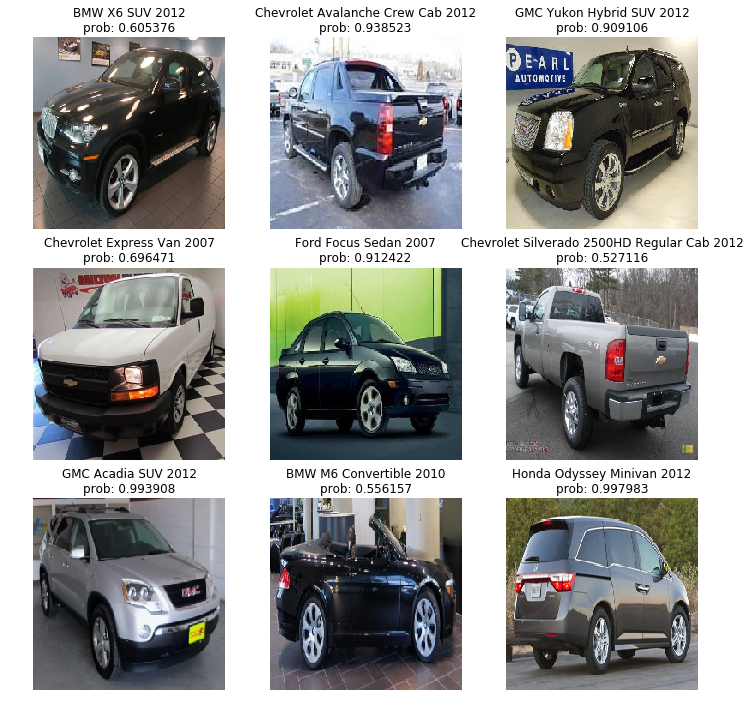

In [10]:
from PIL import Image

def show_predictions(preds, classes):

  plt.figure(figsize=(12,12))

  for i, fname in enumerate(sorted(preds)):
    label = preds[fname][0]
    model = classes[label]
    prob = preds[fname][1]
    title = '{}\nprob: {:2f}'.format(model, prob)
    img = Image.open(str(img_folder/fname))
    img = img.resize((224,224))
    ax = plt.subplot(3,3,i+1,)
    ax.imshow(img)
    ax.set_axis_off()
    ax.set_title(title)
    
show_predictions(preds, classes)

In [0]:
def predictions(preds, classes):
  print('Image, Confidence, Label, Car_Model')
  for fname in sorted(preds):
    prob = preds[fname][1]
    label = preds[fname][0]
    model = classes[label]
    print('{}, {:4f}, {}, {}'.format(fname, prob, label, model))
    

In [9]:
predictions(preds, classes)

Image, Confidence, Label, Car_Model
00035.jpg, 0.605376, 33, BMW X6 SUV 2012
00044.jpg, 0.938523, 65, Chevrolet Avalanche Crew Cab 2012
00056.jpg, 0.909106, 120, GMC Yukon Hybrid SUV 2012
00065.jpg, 0.696471, 71, Chevrolet Express Van 2007
00097.jpg, 0.912422, 115, Ford Focus Sedan 2007
00121.jpg, 0.527116, 69, Chevrolet Silverado 2500HD Regular Cab 2012
00127.jpg, 0.993908, 121, GMC Acadia SUV 2012
00135.jpg, 0.556157, 36, BMW M6 Convertible 2010
00140.jpg, 0.997983, 126, Honda Odyssey Minivan 2012
